# Problem Definition

Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.

# Solution

To solve this problem, we will follow the typical machine learning pipeline. We will first import the required libraries and the dataset. We will then do exploratory data analysis to see if we can find any trends in the dataset. Next, we will perform text preprocessing to convert textual data to numeric data that can be used by a machine learning algorithm. Finally, we will use machine learning algorithms to train and test our sentiment analysis models.

# Importing the Required Libraries

The first step as always is to import the required libraries:

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets_df = pd.read_csv("C:\\Users\\steva\\Desktop\\DS\\NCI\\DM_ML\\project\\Airline Twitter sentiment\\US Airline Tweets sentiment.csv")

In [3]:
tweets_df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [4]:
tweets_df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
tweets_df.shape

(14640, 15)

In [6]:
tweets_df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# Data Analysis

Let's explore the dataset a bit to see if we can find any trends. 

In [7]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


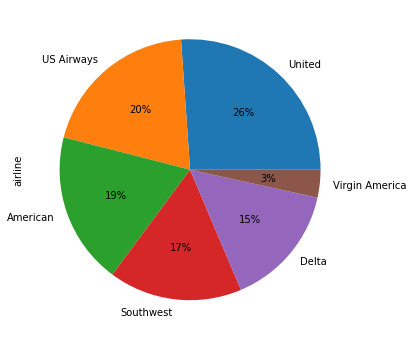

In [8]:
tweets_df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

In the output, you can see the percentage of public tweets for each airline. United Airline has the highest number of tweets i.e. 26%, followed by US Airways (20%).



Let's now see the distribution of sentiments across all the tweets. 

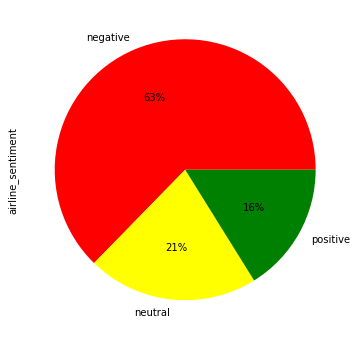

In [9]:
tweets_df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

From the output, you can see that the majority of the tweets are negative (63%), followed by neutral tweets (21%), and then the positive tweets (16%).

Next, let's see the distribution of sentiment for each individual airline,

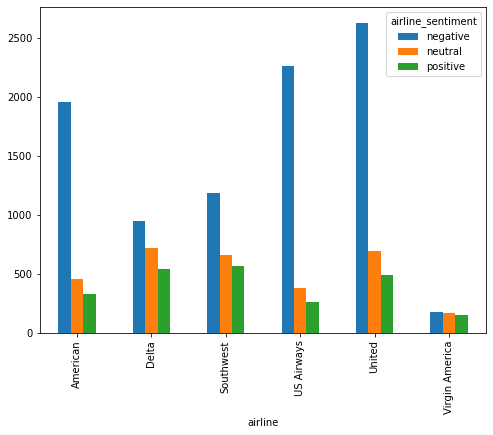

In [10]:
sentiment = tweets_df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
sentiment.plot(kind='bar')

It is evident from the output that for almost all the airlines, the majority of the tweets are negative, followed by neutral and positive tweets. Virgin America is probably the only airline where the ratio of the three sentiments is somewhat similar.

let's use the Seaborn library to view the average confidence level for the tweets belonging to three sentiment categories. 

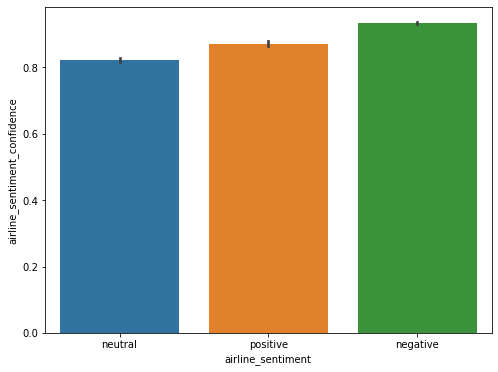

In [11]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=tweets_df)

From the output, you can see that the confidence level for negative tweets is higher compared to positive and neutral tweets.

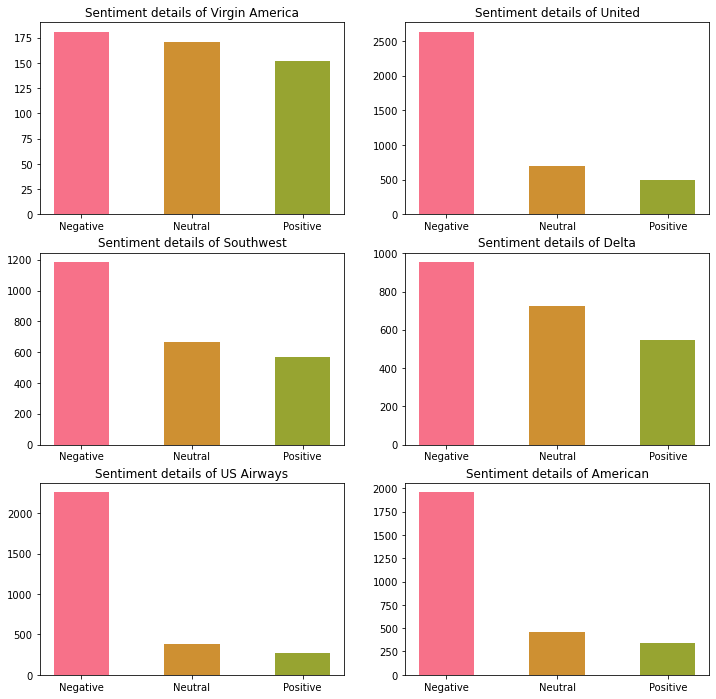

In [12]:
def plot_sub_sentiment(Airline):
    pdf = tweets_df[tweets_df['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 8)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment details of' + " " + Airline)

airline_name = tweets_df['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [13]:
#counting the total number of negative reasons
tweets_df.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0, 0.5, 'Tweets posted')

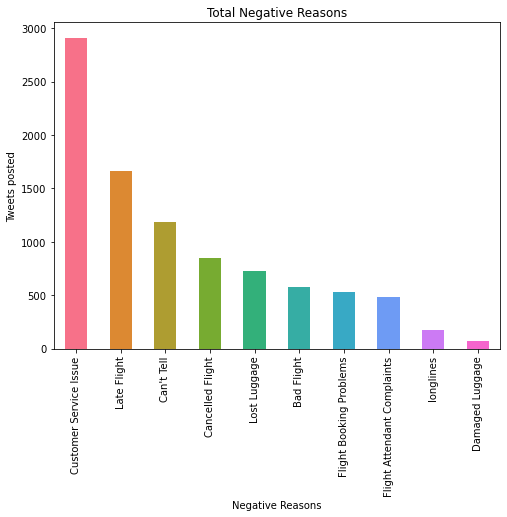

In [14]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(tweets_df["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('Tweets posted', fontsize=10)

# Word Cloud for the negative Tweets

In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
tweets_df_n=tweets_df[tweets_df['airline_sentiment']=='negative']
words = ' '.join(tweets_df_n['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [18]:
wordcloud_n = WordCloud(stopwords=STOPWORDS,
                      background_color='blue',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

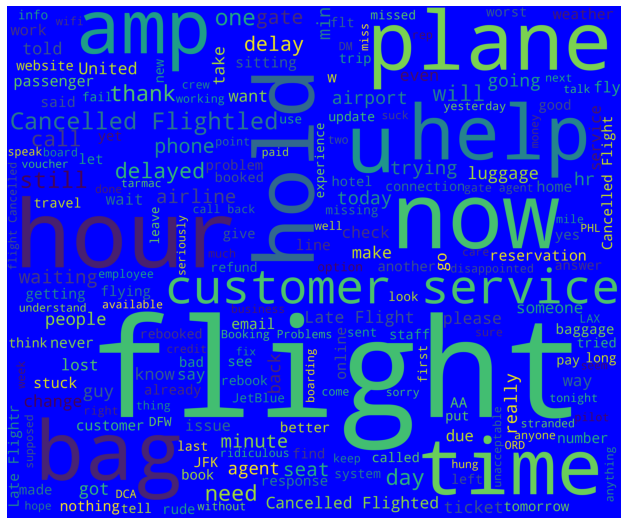

In [19]:
plt.figure(1,figsize=(11, 11))
plt.imshow(wordcloud_n)
plt.axis('off')
plt.show()

# We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.

# Wordcloud for positive reasons

The code for getting positive sentiments is completely same with the one for negative sentiments. Just replace negative with positive in the first line. Easy, right!

In [20]:
tweets_df_p=tweets_df[tweets_df['airline_sentiment']=='positive']
words = ' '.join(tweets_df_p['text'])
cleaned_word1 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [21]:
wordcloud_p= WordCloud(stopwords=STOPWORDS,
                      background_color='blue',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word1)

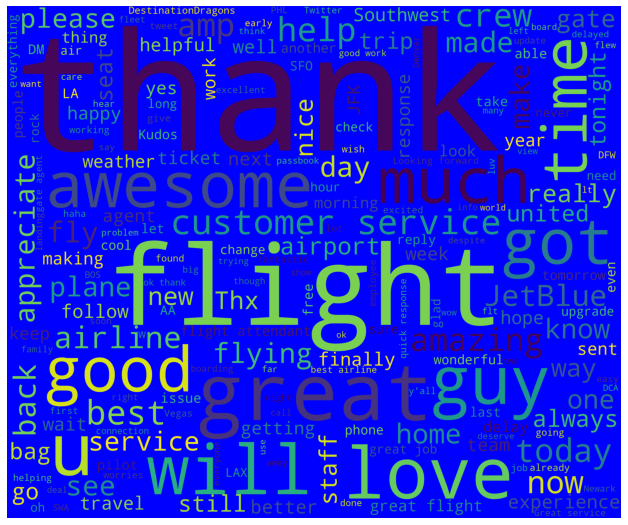

In [22]:
plt.figure(1,figsize=(11, 11))
plt.imshow(wordcloud_p)
plt.axis('off')
plt.show()

In [23]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word1))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

In [28]:
sentiment_numbers=pd.crosstab(tweets_df.airline, tweets_df.airline_sentiment)
sentiment_numbers

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [30]:
sentiment_percentage=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
sentiment_percentage

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


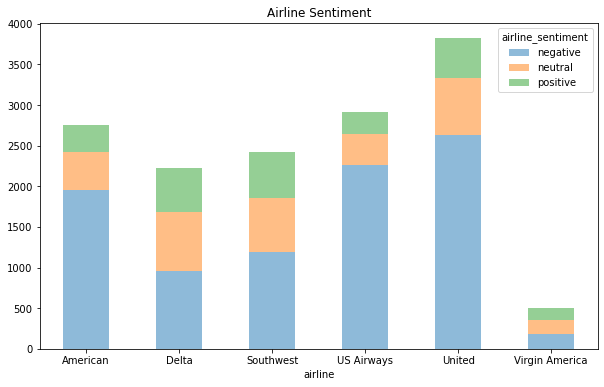

In [31]:
pd.crosstab(index = tweets_df["airline"],columns = tweets_df["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

**American,US Airways , United have more negative tweets**

In [33]:
tweets_df['tweet_created'] = pd.to_datetime(tweets_df['tweet_created'])
tweets_df["date_created"] = tweets_df["tweet_created"].dt.date

In [34]:
tweets_df["date_created"]

0        2015-02-24
1        2015-02-24
2        2015-02-24
3        2015-02-24
4        2015-02-24
            ...    
14635    2015-02-22
14636    2015-02-22
14637    2015-02-22
14638    2015-02-22
14639    2015-02-22
Name: date_created, Length: 14640, dtype: object

In [35]:
df = tweets_df.groupby(['date_created','airline'])
df = df.airline_sentiment.value_counts()
df.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2015-02-16   Delta                1.0      1.0       NaN
             United               2.0      NaN       NaN
2015-02-17   Delta              108.0     86.0      69.0
             Southwest          213.0     85.0      86.0
             US Airways         233.0     30.0      48.0
             United             272.0     75.0      49.0
             Virgin America      12.0     21.0      21.0
2015-02-18   American             1.0      NaN       NaN
             Delta              105.0     86.0      77.0
             Southwest          110.0    106.0      76.0
             US Airways         244.0     32.0      41.0
             United             257.0     90.0      59.0
             Virgin America      19.0     21.0      20.0
2015-02-19   American             NaN      NaN       1.0
             Delta              135.0     70.0      78.0
             Southwest          127.0     94.0      96.0
             US Airways         193.0     54.0      32.0
             United             272.0     85.0      69.0
             Virgin America      24.0     26.0      20.0
2015-02-20   American             1.0      NaN       NaN
             Delta               91.0     90.0      70.0
             Southwest          132.0    110.0      77.0
             US Airways         248.0     52.0      33.0
             United             342.0     99.0      85.0
             Virgin America      21.0     32.0      17.0
2015-02-21   American             1.0      NaN       NaN
             Delta               98.0     79.0      66.0
             Southwest          257.0     60.0      53.0
             US Airways         291.0     39.0      30.0
             United             365.0     88.0      53.0
             Virgin America      37.0     12.0      28.0
2015-02-22   American           762.0    132.0      94.0
             Delta              255.0     76.0      77.0
             Southwest          129.0     77.0      73.0
             US Airways         561.0     60.0      27.0
             United             532.0    102.0      69.0
             Virgin America      27.0     16.0      10.0
2015-02-23   American           826.0    178.0     137.0
             Delta              125.0    195.0      71.0
             Southwest          116.0     83.0      77.0
             US Airways         372.0     74.0      42.0
             United             449.0    109.0      83.0
             Virgin America      31.0     37.0      23.0
2015-02-24   American           369.0    153.0     104.0
             Delta               37.0     40.0      36.0
             Southwest          102.0     49.0      32.0
             US Airways         121.0     40.0      16.0
             United             142.0     49.0      25.0
             Virgin America      10.0      6.0      13.0

Enough of the exploratory data analysis, our next step is to perform some preprocessing on the data and then convert the numeric data into text data as shown below.

# Data Cleaning

Tweets contain many slang words and punctuation marks. We need to clean our tweets before they can be used for training the machine learning model. However, before cleaning the tweets, let's divide our dataset into feature and label sets.

Our feature set will consist of tweets only. If we look at our dataset, the 11th column contains the tweet text. Note that the index of the column will be 10 since pandas columns follow zero-based indexing scheme where the first column is called 0th column. Our label set will consist of the sentiment of the tweet that we have to predict. The sentiment of the tweet is in the second column (index 1). To create a feature and a label set, we can use the iloc method off the pandas data frame.

In [36]:
features = tweets_df.iloc[:, 10].values
labels = tweets_df.iloc[:, 1].values

In [37]:
features

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [38]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

Once we divide the data into features and training set, we can preprocess data in order to clean it. To do so, we will use regular expressions. 

In [39]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [40]:
processed_features

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

# Representing Text in Numeric Form

To make statistical algorithms work with text, we first have to convert text to numbers. To do so, three main approaches exist i.e. Bag of Words, TF-IDF and Word2Vec. 

# TF-IDF

In the bag of words approach, each word has the same weight. The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual document contribute more towards classification.

TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:

In [41]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [42]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In the code above, we define that the max_features should be 2500, which means that it only uses the 2500 most frequently occurring words to create a bag of words feature vector. Words that occur less frequently are not very useful for classification.

Similarly, max_df specifies that only use those words that occur in a maximum of 80% of the documents. Words that occur in all documents are too common and are not very useful for classification. Similarly, min-df is set to 7 which shows that include words that occur in at least 7 documents.

# Dividing Data into Training and Test Sets

n the previous section, we converted the data into the numeric form. As the last step before we train our algorithms, we need to divide our data into training and testing sets. The training set will be used to train the algorithm while the test set will be used to evaluate the performance of the machine learning model.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Training the Model

Once data is split into training and test set, machine learning algorithms can be used to learn from the training data. 
The sklearn.ensemble module contains the RandomForestClassifier class that can be used to train the machine learning model using the random forest algorithm. To do so, we need to call the fit method on the RandomForestClassifier class and pass it our training features and labels, as parameters.

In [44]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

# Making Predictions and Evaluating the Model

The last step is to make predictions on the model. To do so, we need to call the predict method on the object of the RandomForestClassifier class that we used for training.

In [45]:
predictions = text_classifier.predict(X_test)

To evaluate the performance of the machine learning models, we can use classification metrics such as a confusion metrix, F1 measure, accuracy, etc.

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


# KNN ALGO

In [47]:
from sklearn.neighbors import KNeighborsClassifier
text_classifier2 = KNeighborsClassifier(n_neighbors = 5)#no of neighbors is hpyer parameter
text_classifier2.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
predictions2 = text_classifier2.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(accuracy_score(y_test, predictions2))

[[1500  316   54]
 [ 252  310   52]
 [ 118  103  223]]
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      1870
     neutral       0.43      0.50      0.46       614
    positive       0.68      0.50      0.58       444

    accuracy                           0.69      2928
   macro avg       0.64      0.60      0.61      2928
weighted avg       0.70      0.69      0.70      2928

0.6943306010928961


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [51]:
model.fit(X_train, y_train)

C:\Users\steva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
predictions3 = model.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))
print(accuracy_score(y_test, predictions3))

[[1732  115   23]
 [ 268  304   42]
 [ 118   54  272]]
              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1870
     neutral       0.64      0.50      0.56       614
    positive       0.81      0.61      0.70       444

    accuracy                           0.79      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928

0.7882513661202186


# Decision Tree Algorithim

In [54]:
from sklearn.tree import DecisionTreeClassifier
model3= DecisionTreeClassifier(criterion="gini")
#here we are facing the problem of overfitting
#train the model
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
predictions4 = model3.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions4))
print(classification_report(y_test,predictions4))
print(accuracy_score(y_test, predictions4))

[[1453  295  122]
 [ 267  281   66]
 [ 118   83  243]]
              precision    recall  f1-score   support

    negative       0.79      0.78      0.78      1870
     neutral       0.43      0.46      0.44       614
    positive       0.56      0.55      0.56       444

    accuracy                           0.68      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.68      0.68      0.68      2928

0.6752049180327869
